In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sargas import *
import tqdm
import matplotlib.pyplot as plt

sns.set_palette("Dark2")
sns.set_style("ticks")
sns.set_context("talk")

In [63]:
nparticles = 5
temperature = 1.0
density = 1.0
rc = 3.0
ncycles = 1

# Build the system
lennard_jones = Potential.lennard_jones(1.0, 1.0, rc, True)
configuration = Configuration.lattice(nparticles, density)
system = System(configuration=configuration, potential=lennard_jones)

# Build the propagator
particle_displacement = MCMove.displace_particle(0.1, 0.4, temperature)
propagator = MonteCarlo([particle_displacement], [1], temperature)

# Build the simulation
simulation = Simulation.monte_carlo(system, propagator)

# Add sampler
properties = Sampler.properties(1)
simulation.add_sampler(properties)
#widom = Sampler.widom(500, temperature, 100)
#simulation.add_sampler(widom)

In [64]:
trajectory = Sampler.trajectory("test1.gro", 1)
simulation.add_sampler(trajectory)

In [65]:
simulation.run(1)

In [66]:
# Build the simulation
simulation_rerun = Simulation.rerun_trajectory(lennard_jones, "test1.gro")

# Add sampler
properties_rerun = Sampler.properties(1)
simulation_rerun.add_sampler(properties_rerun)

In [67]:
simulation_rerun.run(10)

OSError: End of trajectory reached.

In [68]:
df_rerun = pd.DataFrame(properties_rerun.data)
df_rerun

,pressure,virial,potential_energy


In [69]:
df = pd.DataFrame(properties.data)
df

,virial,potential_energy,pressure
0,1252.760757,74.496406,82.89739


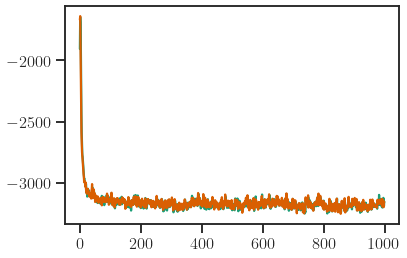

In [55]:
plt.plot(df.potential_energy.values[::10])
plt.plot(df_rerun.potential_energy)

In [57]:
widom = pd.DataFrame(widom_rerun.data)

,mu0
0,-3.174313
1,-2.564644
2,-2.159179
3,-1.871497
4,-1.648354
...,...
995,1.947788
996,1.948792
997,1.949794
998,1.950796


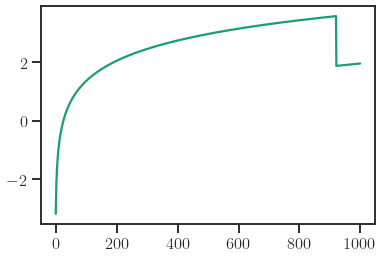

In [60]:
plt.plot(widom.mu0)